# The sampling distribution of the mean

Often we are interested not so much in the distribution of the sample, as a summary statistic such as the mean. For example, later on in the course, we will ask questions like:

* Is the mean height of Oxford students greater than the national average?
* Is the mean wellbeing of cat owners higher than that of non-cat-owners?

We will probably want to answer these questions by *estimating* the population mean (mean height of all Oxford students, mean wellbeing score of all cat owners) from a sample.

However, if we draw multiple samples from the same population, the mean will vary from sample to sample. To know how much we can trust a small difference (eg, the mean of my sample of Oxford students' heights is 1mm taller than the national average - is it just chance?), we will therefore need to answer the following:

**How well does the sample mean reflects the underlying population mean?**

We operationalize this as follows:

**If I drew many different samples from the same population, how much would the sample mean vary from sample to sample**?

Using the computer, we can actually run this simulation - for example drawing 1000 samples from the same population - and plot the sample means. The distribution fo these sample means is called **the sampling distribution of the mean**

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

### Load and plot the data

We continue with the fictional Brexdex dataset.

First load the data:

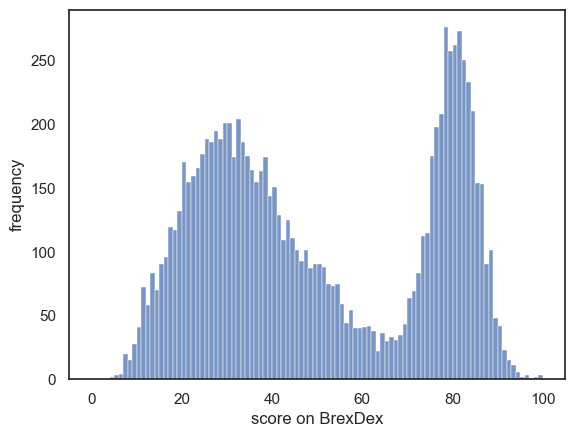

In [2]:
UKBrexdex=pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/UKBrexdex.csv')
sns.histplot(UKBrexdex['score'], bins=range(101))
plt.xlabel('score on BrexDex')
plt.ylabel('frequency')
plt.show()

# The sampling distribution of the mean

The mean Brexdex score can be obtained from the UK national sample as follows:

In [3]:
UKBrexdex['score'].mean()

49.8748

The mean score in the national sample is 49.9%.

Given that each of our smaller samples (with $n=100$) resemble the parent distribution, we might expect that the mean of each of these samples approximates the mean of the UK national sample.

Let's try drawing a large number of random samples with $n=100$, and getting the mean of each one:

In [4]:
nSamples = 10000 # we will draw 10,000 samples
n=100 # each sample contains n people

m=np.empty(nSamples) # make an array to store the means

for i in range(nSamples):
    sample = np.random.choice(UKBrexdex['score'], 100, replace=False)
    m[i]=sample.mean()

Let's plot the resulting means:

Text(0.5, 0, 'sample mean')

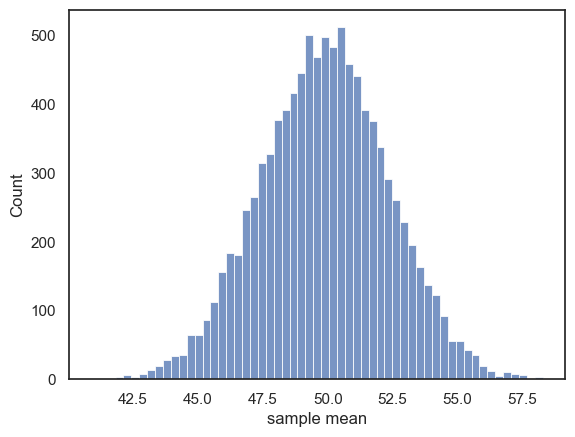

In [5]:
sns.histplot(m)
plt.xlabel('sample mean')

The distribution of sample means is approximately normal.

## Expected value of the mean

The expected value of the sample mean is simply the mean of the parent distribution. In other words, the means obtained from our 10,000 samples cluster around the mean of the UK national sample, which was 49.9.

In [6]:
m.mean() # get the mean of the 10,000 sample means

49.877216000000004

## Standard Error of the mean

Although the sample means group around the mean of the parent distrbution, there is some random variation, as some samples (by chance) contain higher Brexdex scores than others.

The variability of the sample means is quantified by the standard deviation of the sampling distribution of the mean (ie the sd of the data in the histogram above), which is about 2.46.

In [7]:
m.std()

2.4641076212990374

As we saw in the lecture, the standard deviation of the sampling distribution of the mean has a special name, the <b><i>standard error of the mean</i></b> or SEM, and is given by the formula:

$$ SEM = \frac{\sigma}{\sqrt{n}} $$

... where $\sigma$ is that standard deviation of the parent distribution, which in this case where we (unusually) have access to the UK national sample of 10000 individuals, we can obtain as follows:

In [8]:
UKBrexdex['score'].std()

24.792720561876358

Shall we check if the formula for the SEM gives us a match to the standard deviation of the sampling distribution of the mean?

In [9]:
print('sd of sampling distribution (from simulation) = ' + str(m.std()))

SEM = UKBrexdex['score'].std()/(n**0.5) # n to the power 0.5 is sqrt of n
print('SEM from the formula = ' + str(SEM))

sd of sampling distribution (from simulation) = 2.4641076212990374
SEM from the formula = 2.479272056187636


This is not a bad match!

## $SEM \propto \frac{1}{\sqrt{n}} $

The standard error of the mean is inversely proportional to $\sqrt{n}$

In other words, the random variability in sample means decreases as sample size $n$ increases - but in proportion to $\sqrt{n}$ not $n$ itself

We can see this if we construct the sampling distribution of the mean for samples of different sizes, say $n=50, 100, 1000$

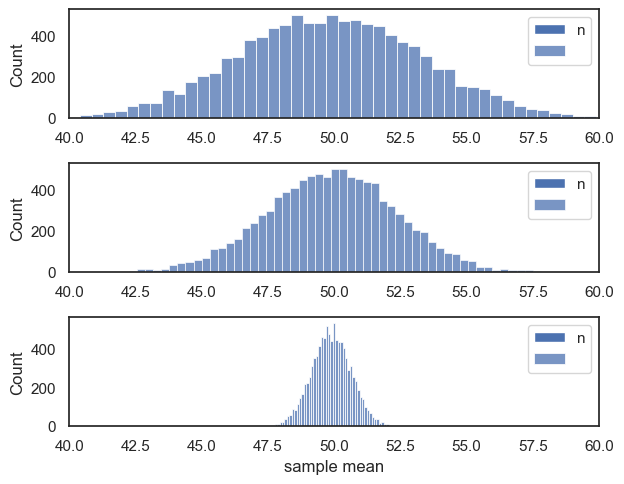

In [10]:
nSamples = 10000 # we will draw 10,000 samples
m=np.empty(nSamples) # make an array to store the means

nVals = [50,100,1000] # values of n to try

# this loop tries different values of n
for j in range(len(nVals)): 
    
    # this loop draws 10,000 samples of size n
    for i in range(nSamples):
        sample = np.random.choice(UKBrexdex['score'], nVals[j], replace=False)
        m[i]=sample.mean()
        
    # plot the distribution for each value of n
    plt.subplot(3,1,j+1)
    sns.histplot(m)
    plt.legend('n = ' + str(nVals[j]))
    plt.xlim([40,60])

plt.tight_layout()
plt.xlabel('sample mean')
plt.show()

## Normal Distribution

The <b>Central Limit Theorem</b> states that when $n$ is sufficiently large, the sampling distribution of the means of samples of size $n$ is a normal distribution, with a mean equivalent to the mean of the parent distribution, and a standard deviation equivalent to the SEM.

Let's check how well our sampling distribution for samples of size n=100 matches the predicted normal distribution.

First we regenerate our 10,000 samples of size 100:

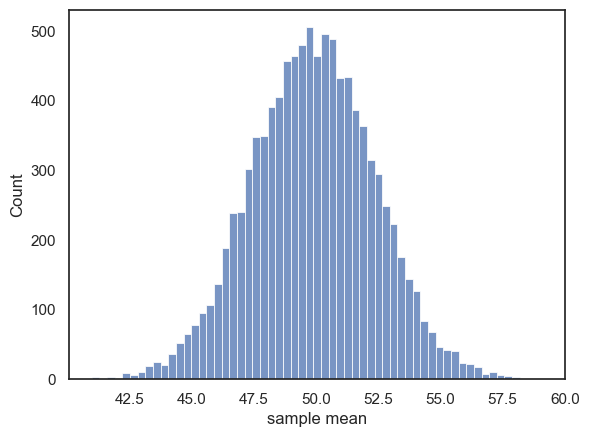

In [11]:
nSamples = 10000 # we will draw 10,000 samples
n=100 # each sample contains n people

m=np.empty(nSamples) # make an array to store the means

for i in range(nSamples):
    sample = np.random.choice(UKBrexdex['score'], n, replace=False)
    m[i]=sample.mean()
    
sns.histplot(m)
plt.xlabel('sample mean')
plt.show()

Now we make our predicted normal sampling distribution of the mean.

Its mean $\mu$ should be the mean of the parent distribution:

In [12]:
mu = UKBrexdex['score'].mean()
print(mu)

49.8748


Its standard deviation should be the SEM: 

$$SEM = \frac{\sigma}{\sqrt{n}} $$

where $\sigma$ is the standard deviaition of the parent distribution:

In [13]:
SEM = UKBrexdex['score'].std()/(n**0.5)
print(SEM)

2.479272056187636


Then we obtain the PDF of the normal distribution $\mathcal{N}(\mu, SEM)$ for a suitable range of x-axis values (based on the histogram above):

[]

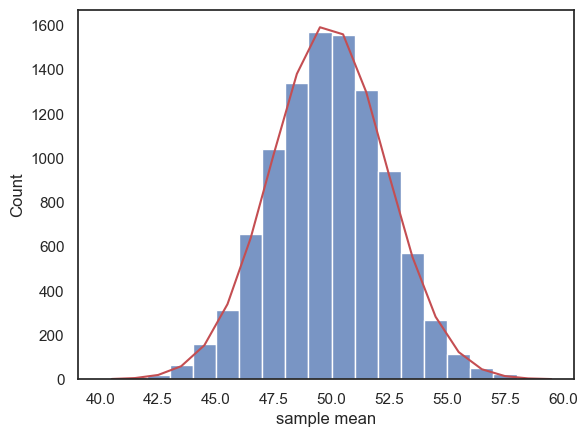

In [14]:
x = np.arange(40.5,60.5) # x axis values are from 40.5 to 60.5 (the .5 is to match the middle of the bars in the histogram)
p = stats.norm.pdf(x,mu,SEM) 
freq = p*nSamples # expected frequency of each sample mean is the probability of that sample mean, time total number of samples (10,000 in our example)

sns.histplot(m, bins=range(40,60))
plt.plot(x,freq,'r')
plt.xlabel('sample mean')
plt.plot()

This is not a bad match!

## How unusual is my sample mean?

Say we give the Brexdex questionnaire to 100 statistics undergraduates in Oxford, and their mean score is 55.1, as opposed to the mean in the UK national sample, 49.9. Can we infer that the students have different political attitude to the UK population as a whole?

The sampling distribution of the mean tells us the distribution of sample means we expect to get if we draw samples from the parent population (the UK national sample)

### Using the simulated sampling distribution of the mean

What proportion of sample means in our simulated sampling distribution exceeded 55.1?

In [15]:
# regenerate the sampling distribubtion
nSamples = 10000 # we will draw 10,000 samples
n=100 # each sample contains n people

m=np.empty(nSamples) # make an array to store the means

for i in range(nSamples):
    sample = np.random.choice(UKBrexdex['score'], 100, replace=False)
    m[i]=sample.mean()
    
print('proportion of sample means greater than 55.1 = ' + str((m>55.1).mean()) +  ' or ' + str((m>55.1).mean()*100) + '%')

proportion of sample means greater than 55.1 = 0.0192 or 1.92%


In other words, the mean Brexdex score of the students was high enough that we would expect it to occur less than 2% of the time for samples drawn from the UK national population - we might conclude that the political attitudes of the students differ from those of the population as a whole.

### Using the Normal distribution

We can ask how likely this mean was to have occurred under the assumption that the Oxford students have similar political attitudes to the population as a whole, using the CDF of the normal distribution:

In [16]:
mu = UKBrexdex['score'].mean()
SEM = UKBrexdex['score'].std()/(n**0.5)

p = 1-stats.norm.cdf(55.1,mu,SEM) 
print('proportion of sample means greater than 55.1 = ' + str(p) +  ' or ' + str(p*100) + '%')

proportion of sample means greater than 55.1 = 0.01753478848973844 or 1.753478848973844%


Hopefully this proportion agrees fairly well with the proportion of actual sample means exceeding 55.1 in the simulation